In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import json

In [145]:
def load_json(file_path):
    return json.load(open(file_path, 'r'))

In [55]:
dev_simulated_a1 = json.load(open("./ann1/dev_simulated.json", "r"))
dev_simulated_a2 = json.load(open("./ann2/dev_simulated.json", "r"))

In [146]:
train_simulated_a1 = load_json("./ann1/train_simulated.json")
train_simulated_a2 = load_json("./ann2/train_simulated.json")

In [147]:
test_simulated_a1 = load_json("./ann1/test_simulated.json")
test_simulated_a2 = load_json("./ann2/test_simulated.json")

In [150]:
arg_names = ["roleset_id", "arg0", "arg1", "argL", "argT"]


def get_cor_incor(split_simu):
    correct = [0 for _ in arg_names]
    incorrects = [0 for _ in arg_names]

    for task in split_simu:
        for i, arg in enumerate(arg_names):
            if arg in task["predicted"] and task[arg] == task["predicted"][arg]:
                correct[i]+=1
            else:
                incorrects[i]+=1
    
    total = correct[-1] + incorrects[-1]
    correct = np.array(correct)/total
    incorrects = np.array(incorrects)/total
    return correct, incorrects

cor_a1, incor_a1 = get_cor_incor(dev_simulated_a1)

In [151]:
all_anns = [get_cor_incor(train_simulated_a1), get_cor_incor(train_simulated_a2), 
            get_cor_incor(dev_simulated_a1), get_cor_incor(dev_simulated_a2),
           get_cor_incor(test_simulated_a1), get_cor_incor(test_simulated_a2)]

In [234]:
# Sample data
categories = ['RS ID', 'ARG-0', 'ARG-1', 'ARG-LOC', 'ARG-TIME']
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Arial"


# Choose color palettes for each set of values
colors1 = ['yellowgreen']
colors2 = ['salmon']
colors3 = ['springgreen']
colors4 = ['orange']

# Create a bar chart with two sets of values
bar_width = 0.4  # Width of each bar
index = np.arange(len(categories))  # X-axis positions for the bars

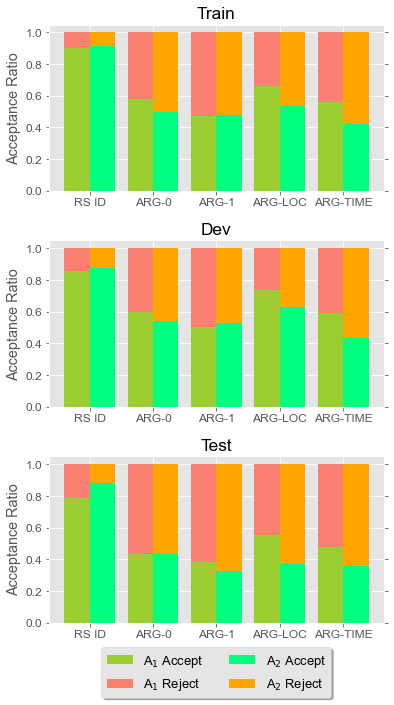

In [295]:
##### plt.figure(figsize=(20, 4))  # Set the figure size
plt.rcParams.update({'font.size': 12})
fig, (axes) = plt.subplots(3, 1, figsize=(6,11))

axes = axes

for i, (correct, incorrects) in enumerate(all_anns):
    curr_ax = i // 2
    curr_ind = -0.2
    c1 = colors1
    c2 = colors2
    l1 = "A$_{1}$ Accept"
    l2 = "A$_{1}$ Reject"
    if i % 2 == 1:
        c1 = colors3
        c2 = colors4
        curr_ind = 0.2
        l1 = "A$_{2}$ Accept"
        l2 = "A$_{2}$ Reject"
    axes[curr_ax].bar(index + curr_ind, correct, bar_width, color=c1, label=l1)
    axes[curr_ax].bar(index + curr_ind, incorrects, bar_width, color=c2, label=l2, bottom=correct)

    # Add labels and title
#     axes[i].set_xlabel('Arguments')
    axes[curr_ax].set_ylabel('Acceptance Ratio')
#     axes[i].set_title(f'A{i+1}')
    axes[curr_ax].set_xticks(index, categories, rotation=0)
# Add a legend

# axes[0].set_ylabel("")
# axes[1].yaxis.tick_right()
# axes[3].yaxis.tick_right()
# axes[5].yaxis.tick_right()
# yticks = axes[0].get_yticks()
# axes[1].sharey(axes[1])
# axes[1].set_yticks(yticks)
# axes[0].set_yticklabels([])
# axes[0].set_ylabel("Train", rotation=0, labelpad=20)
# axes[1].set_ylabel("Dev", rotation=0, labelpad=20)
# axes[2].set_ylabel("Test", rotation=0, labelpad=20)

# axes[0].yaxis.set_label_position("right")
# axes[1].yaxis.set_label_position("right")
# axes[2].yaxis.set_label_position("right")
axes[0].yaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')
axes[2].yaxis.set_ticks_position('both')

axes[0].set_title("Train")
axes[1].set_title("Dev")
axes[2].set_title("Test")

lgd = axes[-1].legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2, fontsize=13)

plt.subplots_adjust(hspace=0.3)
# Customize the style (optional)
plt.style.use('ggplot')

# Adjust the X-axis labels
# plt.xticks(index, categories, rotation=15)

# Show the plot
# plt.show()
plt.savefig("dev_args_ratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [250]:
gpt_g2 = json.load(open('./gpt-4/dev_small_g2.json'))
gpt_adj = json.load(open('./gpt-4/dev_small_adj_xamr.json'))

In [251]:
g_cors = []
g_incors = []

m_id2ann1 = {task['mention_id']: task for task in json.load(open("./ann1/dev_small_xamr.json"))}

In [255]:
rs_cors = 0
rs_incors = 0

for g_t in gpt_g2:
    if g_t['roleset_id'] == m_id2ann1[g_t['mention_id']]['roleset_id']:
        rs_cors+=1
    else:
        rs_incors+=1

In [260]:
mid2gpt_g2 = {task['mention_id']: task for task in gpt_g2}
mid2gpt_adj = {task['mention_id']: task for task in gpt_adj}

In [274]:
arg_cors = [0 for _ in arg_names[1:]]
arg_incors = [0 for _ in arg_names[1:]]
for mid in list(mid2gpt_g2.keys()):
    t1 = mid2gpt_g2[mid]
    t2 = mid2gpt_adj[mid]
    for i, arg_nam in enumerate(arg_names[1:]):
        if t1[arg_nam] == t2[arg_nam]:
            arg_cors[i]+=1
        else:
            arg_incors[i]+=1
arg_cors = np.array([rs_cors] + arg_cors)/120
arg_incors = np.array([rs_incors] + arg_incors)/120

In [275]:
print(arg_cors)
print(arg_incors)

[0.59166667 0.65833333 0.53333333 0.94166667 0.75833333]
[0.40833333 0.34166667 0.46666667 0.05833333 0.24166667]


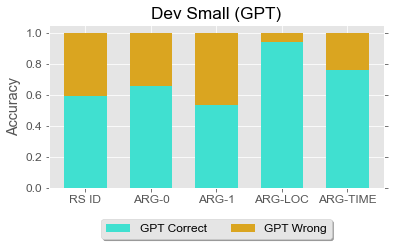

In [293]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1, 1, figsize=(6,3))

ax.bar(index, arg_cors, 0.65, color="turquoise", label="GPT Correct")
ax.bar(index, arg_incors, 0.65, color="goldenrod", label="GPT Wrong", bottom=arg_cors)
ax.set_xticks(index, categories, rotation=0)
ax.set_ylabel('Accuracy')
ax.set_title("Dev Small (GPT)")
ax.yaxis.set_ticks_position('both')
lgd = ax.legend(loc='center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=2, fontsize=12)
# plt.show()
plt.savefig("gpt_ratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')